
## Input Products
Importing the points downloaded from the GEE code into csv files, as Dataframes 

In [2]:
# Importing the necessary libraries 
import geemap
import pandas as pd
# Importing the csv products as Pandas DataFrame
unburned_points = pd.read_csv('C:/Users/user/OneDrive - Politecnico di Milano/Desktop/geoinf project/Total-UNB.csv')
burned_points = pd.read_csv('C:/Users/user/OneDrive - Politecnico di Milano/Desktop/geoinf project/Total-burned.csv')

In [3]:
# To create class balance only 1200 unburned and 1200 burned points are extracted
# Choose 1200 random points from each DataFrame
new_unburned = unburned_points.sample(n=1200, random_state=1)  # Adjust random_state for reproducibility
new_burned = burned_points.sample(n=1200, random_state=1)
new_unburned
new_burned

,hazard,Aspect,HumanImpactIndexMean,LandCover,NDMI,NDVI,Precipitation,Slope,SoilMoist,TempMax,TempMin,WaterDeficit,WindSpeed,idx
801,1,46.068108,121.15,1,0.161636,0.493549,122.666667,3.837614,210.000000,143.50,43.00,0.000000,350.000000,4
550,1,196.903050,26.75,17,0.219376,0.576734,60.833333,4.895485,2974.000000,272.00,162.00,274.666667,429.000000,0
478,1,78.747010,1357.95,17,0.046957,0.374273,74.500000,0.445577,241.333333,326.50,242.00,305.000000,226.428571,3
875,1,225.129010,2751.90,9,0.266130,0.573147,52.000000,0.698365,462.000000,150.00,46.25,0.021978,230.000000,4
108,1,307.663670,468.60,2,0.275840,0.679766,84.000000,23.611643,1843.666667,147.00,60.00,0.000000,249.000000,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1050,1,0.000000,343.80,10,-0.018294,0.217537,13.000000,0.347805,60.760000,128.75,1.50,245.000000,310.000000,6
1067,1,71.674790,1292.25,8,0.344330,0.675414,147.272727,0.092186,1431.000000,322.00,240.00,0.033333,196.666667,1
497,1,284.042270,346.00,17,0.115760,0.283312,45.400000,0.358358,332.000000,282.50,186.00,562.000000,461.200000,2
792,1,94.784000,1156.80,17,0.220899,0.533260,42.000000,0.695032,151.000000,166.00,73.50,277.000000,508.000000,0


In [4]:
from sklearn import preprocessing
# Concatenate the two DataFrames
combined_data = pd.concat([new_burned, new_unburned], ignore_index=True)
combined_data = combined_data.drop(columns=['idx'])
# features = combined_data.drop(columns=['hazard'])
# target_variable = combined_data['hazard'] 
# normalized_data = preprocessing.normalize(features)
# scaled_df = pd.DataFrame(normalized_data, columns=features.columns)
# scaled_df['hazard'] = target_variable
# scaled_df
combined_data

C:\ProgramData\Anaconda3\envs\se4g_test\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


,hazard,Aspect,HumanImpactIndexMean,LandCover,NDMI,NDVI,Precipitation,Slope,SoilMoist,TempMax,TempMin,WaterDeficit,WindSpeed
0,1,46.068108,121.15,1,0.161636,0.493549,122.666667,3.837614,210.000000,143.5,43.00,0.000000,350.000000
1,1,196.903050,26.75,17,0.219376,0.576734,60.833333,4.895485,2974.000000,272.0,162.00,274.666667,429.000000
2,1,78.747010,1357.95,17,0.046957,0.374273,74.500000,0.445577,241.333333,326.5,242.00,305.000000,226.428571
3,1,225.129010,2751.90,9,0.266130,0.573147,52.000000,0.698365,462.000000,150.0,46.25,0.021978,230.000000
4,1,307.663670,468.60,2,0.275840,0.679766,84.000000,23.611643,1843.666667,147.0,60.00,0.000000,249.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2395,0,88.705880,133.20,16,0.055960,0.025670,0.500000,6.390130,0.000000,154.0,5.50,1286.000000,520.500000
2396,0,228.752580,53.05,16,0.058755,0.060205,0.000000,1.801812,0.000000,223.0,97.00,1505.000000,346.000000
2397,0,190.742580,0.00,16,-0.073773,0.056062,1.500000,2.505995,40.000000,-17.5,-160.50,0.000000,440.200000
2398,0,55.880940,22.75,16,-0.064365,0.028766,0.000000,9.723423,0.000000,194.5,43.50,1473.000000,460.000000



## Libraries
Importing the necessary libraries 

In [5]:
import numpy as np

# Statistical libraries
from scipy import stats

# Plotting libraries
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Preprocessing
from sklearn.preprocessing import StandardScaler

# Evaluation Procedures
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold

# Classification methods
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier

from sklearn.ensemble import VotingClassifier

# Evaluation Metrics
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report

Next we define some utility functions.

In [6]:
def PrintConfusionMatrix(model, true_y, predicted_y, positive=1, negative=-1):
    cm = confusion_matrix(true_y,predicted_y)
    print("\t"+str(model.classes_[0])+"\t"+str(model.classes_[1]))
    print(str(model.classes_[0]) + "\t",cm[0][0],"\t",cm[0][1])
    print(str(model.classes_[1]) + "\t",cm[1][0],"\t",cm[1][1])    

def PrintSignificance(stat, c):
    if (stat[1]<(1-c)):
        print("The difference is statistically significant (cf %3.2f p-value=%.4f)"%(c,stat[1]))
    else:
        print("The difference is not statistically significant (cf %3.2f p-value=%.4f)"%(c,stat[1]))        

## Data, Training and Testing Sets
We load the data, define the input data X and the target column y. Next, we set the random seed, define a training/test partition, and the crossvalidation procedure we will use to compare the models.

Note that in this notebook we don't perform any data exploration or preparation since we already performed it before.

In [7]:
# loans = pd.read_csv('D:/polimi courses/geo project/HexMethod/all-points_hex.csv')
# loans.sort_values(by=['NDVI'], ascending=False, inplace=True)
target_variable = 'hazard' #which represents the class burned or unburned for the pixels
input_variables = combined_data.columns[combined_data.columns!=target_variable]

X = combined_data[input_variables] #the features 
y = combined_data[target_variable]

In [8]:
np.random.seed(1234)

X_train, X_test, y_train, y_test = \
    train_test_split(X, y,\
    test_size= 0.2, random_state =1234, shuffle=True)

crossvalidation = StratifiedKFold(n_splits=30, shuffle=True)

# Model Evaluation
We are employing various classification algorithms to model and predict the occurrence of wildfires based on given features.These diverse methods allow us to assess the impact of algorithmic choices on the performance of wildfire prediction.
1. Decision Trees recursively split the dataset based on features to create a tree-like structure.
2. Bagging (Bootstrap Aggregating) involves training multiple decision tree models on different subsets of the dataset, reducing overfitting and improving robustness.
3. Random Forest is an ensemble method that builds multiple decision trees and combines their predictions to improve accuracy and control overfitting.
4. Extremely Randomized Trees method builds multiple decision trees with random feature subsets to enhance diversity and reduce overfitting. 
5. AdaBoost combines weak learners (usually decision trees) into a strong classifier by assigning different weights to misclassified instances during each iteration, emphasizing difficult-to-classify examples.

In [9]:
# Hyperparameters
n_estimators = 100
max_depth = 10
# Dictionary of classification methods
methods = {
    #'Lasso':LogisticRegression(penalty="l1",C=100, random_state=1234, max_iter=300, solver="liblinear"),
    #'NaiveBayes':GaussianNB(),
    #'k-NN(5)':KNeighborsClassifier(n_neighbors=5, algorithm='kd_tree'),
    'Decision Tree':DecisionTreeClassifier(max_depth=None),
    'Bagging(Tree)':BaggingClassifier(DecisionTreeClassifier(max_depth=max_depth),n_estimators=n_estimators),
    #'Bagging(kNN)':BaggingClassifier(KNeighborsClassifier(n_neighbors=max_depth, algorithm='kd_tree'),n_estimators=n_estimators),
    'Random Forest':RandomForestClassifier(n_estimators=n_estimators,max_depth=max_depth,oob_score=True),
    'Extremely Randomized Trees':ExtraTreesClassifier(n_estimators=n_estimators,max_depth=max_depth),
    'Ada Boost':AdaBoostClassifier(DecisionTreeClassifier(max_depth=max_depth),n_estimators=n_estimators)
}

# Metrics 
We use several metrics to evaluate the performance of each classifier. They provide us insights into different aspects of the model's effectiveness.
1. Cross-Validation: Is used to assess the classifier's performance on multiple subsets of the dataset. It helps ensure that the model's performance is consistent across different data partitions.
2. Accuracy is a basic metric that measures the overall correctness of the classifier.It is the ratio of correctly predicted instances to the total instances.
3. Precision measures the accuracy of the positive predictions. It is the ratio of true positive predictions to the total predicted positives. High precision indicates a low false positive rate.
4. Recall (Sensitivity or True Positive Rate) measures the ability of the classifier to capture all the positive instances.It is the ratio of true positive predictions to the total actual positives.
5. F1 Score is the harmonic mean of precision and recall. It provides a balance between precision and recall.
6. Area Under the Receiver Operating Characteristic Curve (AUC-ROC) ROC curve illustrates the trade-off between sensitivity and specificity across different threshold settings.AUC-ROC quantifies the area under the ROC curve and is a measure of the classifier's ability to distinguish between classes.
7. Confusion Matrix provides a detailed breakdown of the classifier's predictions, including true positives, true negatives,false positives, and false negatives. It's useful for understanding the types of errors made by the model.

In [10]:
# Initialize dictionaries and lists to store results
xval_results = {} # Dictionary to store cross-validation results
roc_results = {} # Dictionary to store ROC curve results
feature_importance_model = {} # Dictionary to store feature importance models

method = []
accuracy_mean = [] #mean accuracy
accuracy_std = [] #accuracy standard deviation
precision = [] #precision scores
recall = [] #recall scores
f1 = [] #F1 scores
auc = [] #AUC scores

for method_name in methods:
    
    
    clf = methods[method_name];
    
    # evaluate the model using crossvalidation
    xval_score = cross_val_score(clf,X,y,cv=crossvalidation)
    
    # store the raw results of crossvalidation that we might want to use for t-test/mann-whitney comparison
    xval_results[method_name] = xval_score
    
    # compute the basic statistics
    accuracy_mean.append(np.average(xval_score))
    accuracy_std.append(np.std(xval_score))
    
    clf.fit(X_train,y_train)

    # if the mode can return an evaluation of feature importance we store it to analyze it later
    if hasattr(clf, 'feature_importances_'):
            feature_importance_model[method_name] = (clf,clf.feature_importances_)
    
    # compute the prediction which, for probabilistic classifiers, is using a threshold of 0.5
    yp = clf.predict(X_test)
    
    # ask for the probability values
    yprob = clf.predict_proba(X_test)
        # Confusion Matrix
    conf_matrix = confusion_matrix(y_test, yp)


    # Classification Report
    class_report = classification_report(y_test, yp)
 
    # computes the data needed to draw the ROC curve
    fpr_nb, tpr_nb, thresholds = roc_curve(y_true=y_test, y_score = yprob[:,1], pos_label=1)
    
    # computes the AUC 
    roc_auc = roc_auc_score(y_true=y_test, y_score = yprob[:,1])
    auc.append(roc_auc)

    # store the information to plot the ROC curves afterwards
    roc_results[method_name] = (fpr_nb, tpr_nb, thresholds, roc_auc)
    
    precision.append(precision_score(y_test,yp))
    recall.append(recall_score(y_test,yp))
    f1.append(f1_score(y_test, yp))
    
    print("%40s"%method_name)
    print("========================================")
    print("\t  Accuracy (CV) %.3f %.3f"%(np.average(xval_score),np.std(xval_score)))
    print("\tAccuracy (Test) %.3f"%precision_score(y_test, yp))
    print("\t      Precision %.3f"%precision_score(y_test, yp))
    print("\t      Recall    %.3f"%recall_score(y_test, yp))
    print("\t      F1        %.3f"%f1_score(y_test, yp))
    print("\n")
    print('Classification Report:')
    print(class_report)
    print('Confusion Matrix:')
    print(conf_matrix)
    method.append(method_name)

                           Decision Tree
	  Accuracy (CV) 0.932 0.027
	Accuracy (Test) 0.953
	      Precision 0.953
	      Recall    0.945
	      F1        0.949


Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.95      0.94       225
           1       0.95      0.95      0.95       255

    accuracy                           0.95       480
   macro avg       0.95      0.95      0.95       480
weighted avg       0.95      0.95      0.95       480

Confusion Matrix:
[[213  12]
 [ 14 241]]
                           Bagging(Tree)
	  Accuracy (CV) 0.957 0.024
	Accuracy (Test) 0.957
	      Precision 0.957
	      Recall    0.949
	      F1        0.953


Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.95      0.95       225
           1       0.96      0.95      0.95       255

    accuracy                           0.95       480
   macro avg       0.95      0.95      0

## Receiver Operating Characteristic (ROC) Curves
We can compare the classifiers using the area under the curve values and the corresponding ROC curves. This measure provides an overall evaluation of the model. 

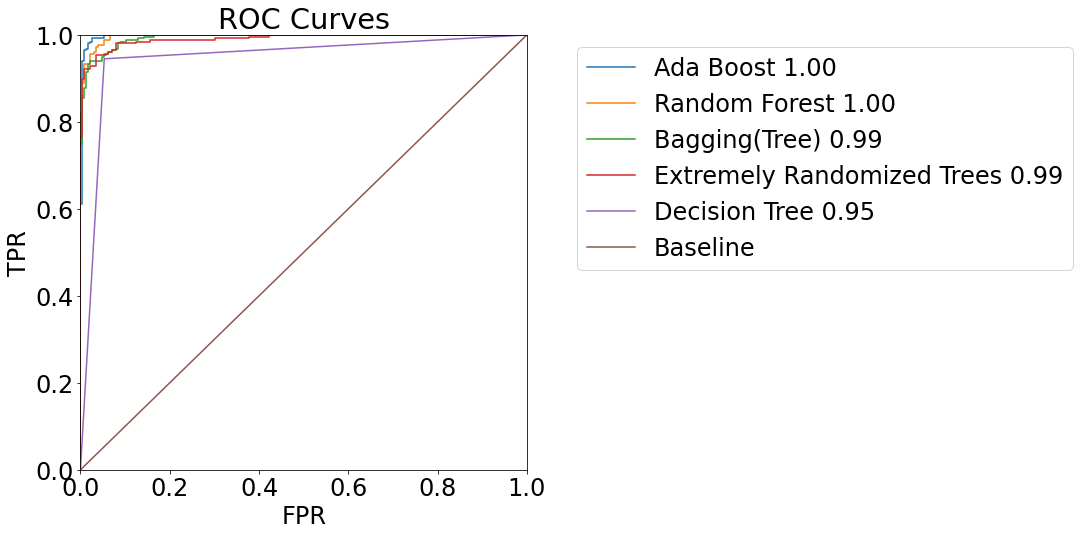

In [11]:
# we sort the AUC values so to have a better legend
sorted_roc_results = sorted(roc_results.items(), key=lambda x: x[1][3], reverse=True)

plt.figure(1, figsize=(8, 8));
font = {'family':'sans', 'size':24};
plt.rc('font', **font);
plt.xlabel('FPR');
plt.ylabel('TPR');
for result in sorted_roc_results:
    plt.plot(result[1][0], result[1][1],label=result[0]+' %.2f'%result[1][3])


# plt.plot(fpr,thresholds,label='Thresholds')
plt.plot([0.0,1.0],[0.0,1.0],label='Baseline')
plt.yticks(np.arange(0.0,1.01,.2))
plt.title('ROC Curves')
plt.ylim([0.0,1.0])
plt.xlim([0.0,1.0])
plt.legend(bbox_to_anchor=(2.25, 1.0))

plt.show();

## Comparing Classifier Performance using Statistical Tests
We can now compare the performance of the classifiers. First, we plot all the performance scores and then we focus on the most interesting ones (that is, the best performing ones) and we check check whether the difference in performance is is statistically significant. 

In [11]:
result_summary = pd.DataFrame({'Model':method,'Accuracy (Mean)':accuracy_mean,'Accuracy (Std)':accuracy_std,'Precision':precision,'Recall':recall,'F1':f1,'AUC':auc})
result_summary.to_csv('C:/Users/user/OneDrive - Politecnico di Milano/Desktop/geoinf project/Wildfire-Summary.csv')

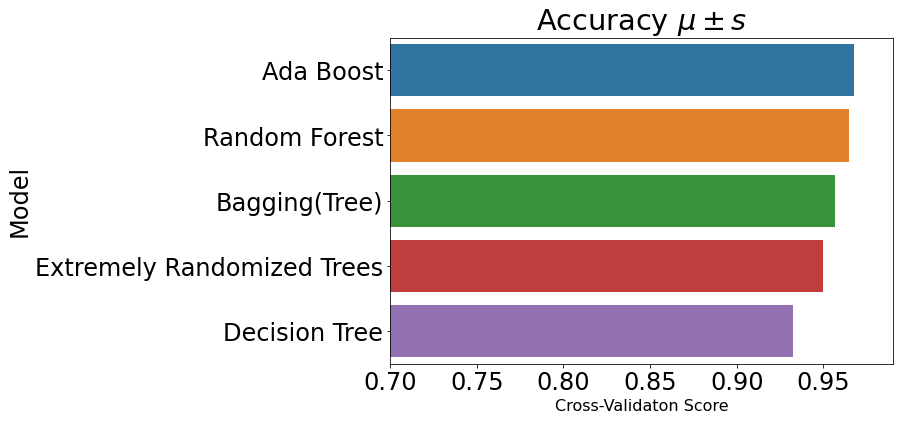

In [12]:
f, axe = plt.subplots(1,1, figsize=(9,6))

result_summary.sort_values(by=['Accuracy (Mean)'], ascending=False, inplace=True)

# sns.barplot(x='Accuracy (Mean)', y='Model', data = result_summary, xerr=result_summary['Accuracy (Std)'], ax = axe)
# sns.barplot(x='Accuracy (Mean)', y='Model', data=result_summary, xerr=result_summary['Accuracy (Std)'].values, ax=axe)
sns.barplot(x='Accuracy (Mean)', y='Model', data=result_summary, ax=axe, capsize=0.1)
axe.set_xlabel('Cross-Validaton Score', size=16)
axe.set_ylabel('Model')
axe.set_title("Accuracy $\mu\pm s$")
axe.set_xlim(0.7,0.99)
plt.show()

In [12]:
df_crossvalidation = pd.DataFrame(xval_results)

In [13]:
df_crossvalidation.drop(columns=['Decision Tree'],inplace=True)

In [14]:
confidence_level = 0.95

no_variables = len(df_crossvalidation.columns)

p_value = np.zeros((no_variables,no_variables))

for first,first_model in enumerate(df_crossvalidation.columns):
    
    p_value[first,first] = 1.0
    
    for second in range(first+1,(len(df_crossvalidation.columns))):

        second_model = df_crossvalidation.columns[second]
        
        paired_test = stats.ttest_rel(df_crossvalidation[first_model], df_crossvalidation[second_model])
    
        p_value[first,second] = paired_test[1]
        p_value[second,first] = paired_test[1]
        
        if (paired_test[1]<(1-confidence_level)):
            print("%15s vs %15s => Difference is statistically significant (cf %3.2f p-value=%.4f)"%(first_model,second_model,confidence_level*100,paired_test[1]))

  Bagging(Tree) vs       Ada Boost => Difference is statistically significant (cf 95.00 p-value=0.0354)
  Random Forest vs Extremely Randomized Trees => Difference is statistically significant (cf 95.00 p-value=0.0118)
Extremely Randomized Trees vs       Ada Boost => Difference is statistically significant (cf 95.00 p-value=0.0031)


## Variable Importance
Ensembles generate models that are difficult to analyze but provide interesting ways to score the variable used by all the models in the ensembles. First, we fit each ensemble,

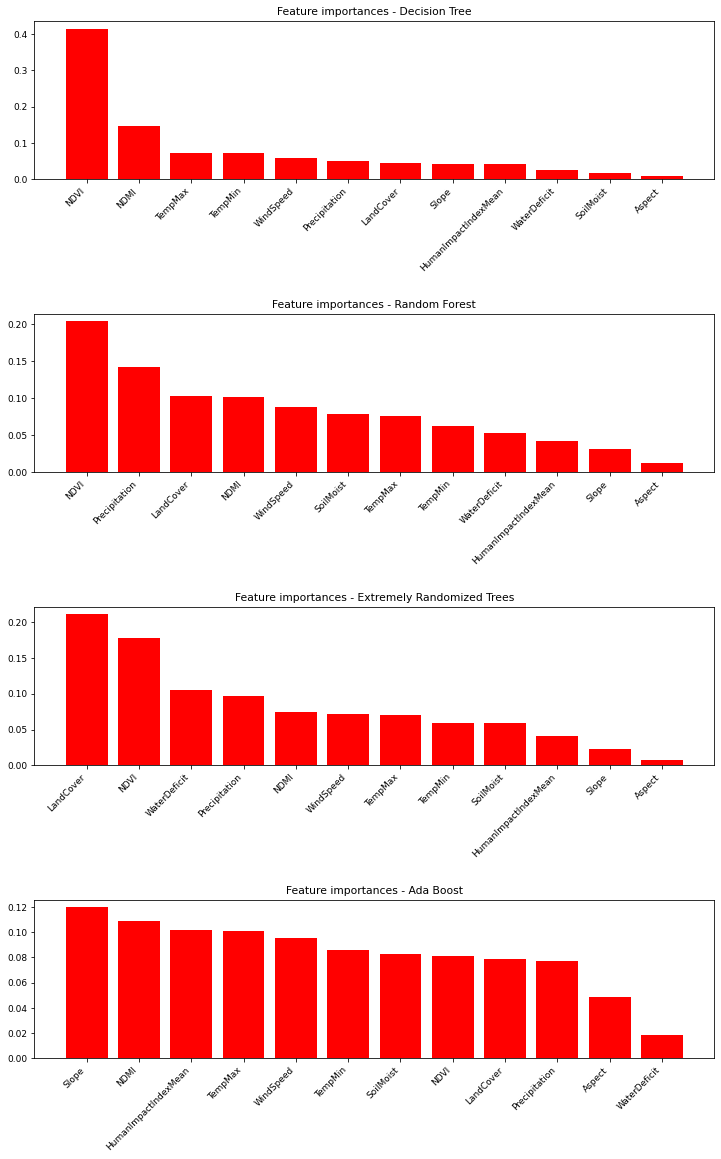

In [16]:
import matplotlib.pyplot as plt

# Set up the subplots
plt.subplots(len(feature_importance_model), 1, figsize=(10, 4 * len(feature_importance_model)))
font = {'family': 'sans', 'size': 9}
plt.rc('font', **font)

plot_idx = 1

# Loop through each model in feature_importance_model
for model_name in feature_importance_model:
    model = feature_importance_model[model_name][0]

    # Get feature importances
    importances = model.feature_importances_

    # Get indices of the variables
    indices = np.argsort(importances)[::-1]

    # Set up the subplot
    plt.subplot(len(feature_importance_model), 1, plot_idx)

    # Plot the feature importances
    plt.title("Feature importances - " + model_name)
    
    # Adjust rotation angle and spacing for better readability
    plt.xticks(range(X.shape[1]), X.columns[indices], rotation=45, ha='right')  

    plt.xlim([-1, X.shape[1]])

    # Plot the bar chart
    plt.bar(range(X.shape[1]), importances[indices], color="r")

    plot_idx += 1

# Adjust layout for better spacing
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=3.0)

# Show the plot
plt.show()
